---
# **Visualisering och tolkning av konvolutionella neurala nätverk.**
---
Konvolutionella neurala nätverk (CNN) är centrala inom datorseende och används för uppgifter som bildklassificering och objektigenkänning. Trots deras höga prestanda är CNN ofta svåra att tolka, vilket gör det svårt att förstå vilka delar av en bild som bidrar till modellens beslut.

AlexNet, en av de tidiga och välkända CNN-arkitekturerna, används ofta som exempelmodell för att studera nätverksbeteende. I detta labb används Grad-CAM (Gradient-weighted Class Activation Mapping) för att visualisera aktiveringar i nätverkets lager. Grad-CAM genererar värmekartor som framhäver de regioner i en bild som är mest avgörande för modellens prediktion, vilket möjliggör en intuitiv förståelse av hur AlexNet tolkar visuella mönster.

Syftet med denna laboration är att analysera och visualisera lager i AlexNet med Grad-CAM, för att undersöka hur nätverket bearbetar information steg för steg och vilka bildregioner som påverkar modellens beslut mest.

In [1]:
from torchinfo import summary
import utils as utils


In [2]:
device = utils.device_test()

Using device: cuda


---
# **ALexNet.**
---
AlexNet är en klassisk konvolutionell neural nätverksarkitektur som introducerades 2012. Modellen består av flera lager av konvolutioner (Conv2d), ReLU-aktiveringar och maxpooling, följt av fullt anslutna 
(fully connected) lager. Totalt innehåller AlexNet över 61 miljoner parametrar.

Visualiseringen sker med Grad-CAM, som genererar värmekartor som visar vilka delar av bilden som aktiverar varje lager mest. Detta ger en tydlig bild av hur AlexNet tolkar och representerar visuella mönster i olika djup av nätverket.

In [9]:
model, weights = utils.model(device)
summary(model, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 1000]                 --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 55, 55]           23,296
│    └─ReLU: 2-2                         [1, 64, 55, 55]           --
│    └─MaxPool2d: 2-3                    [1, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [1, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         [1, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [1, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [1, 384, 13, 13]          663,936
│    └─ReLU: 2-8                         [1, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 256, 13, 13]          884,992
│    └─ReLU: 2-10                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 256, 13, 13]         

---
I detta labb fokuserar jag på att visualisera bara de fem konvolutionella lagren (lagren: 0, 3, 6, 8, 10), eftersom dessa lager extraherar visuella egenskaper från bilder steg för steg.

In [10]:
utils.show_con2d(model)


Conv2d-lager:
features.0 Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
--------------------------------------------------------------------------------
features.3 Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
--------------------------------------------------------------------------------
features.6 Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
--------------------------------------------------------------------------------
features.8 Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
--------------------------------------------------------------------------------
features.10 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
--------------------------------------------------------------------------------


---
# **Analys av konvolutionella  lagren med Grad-Cam.**
---
Grad-CAM kommmer att användas för att visualisera vilka delar av en bild som har störst påverkan på modellens prediktion för en specifik klass, baserat på ett valt konvolutionellt lager. Olika lager i ett CNN lär sig olika nivåer av representationer, och med hjälp av Grad-CAM  kommer jag analysera hur modellens förståelse av bilden utvecklas genom nätverkets lager.

In [11]:
img1, tensor_img1 = utils.load_image('./image1.jpg', device, weights)
y_pred1 = utils.predict(model, weights, tensor_img1)

Predikted klass of picture is: TABBY.


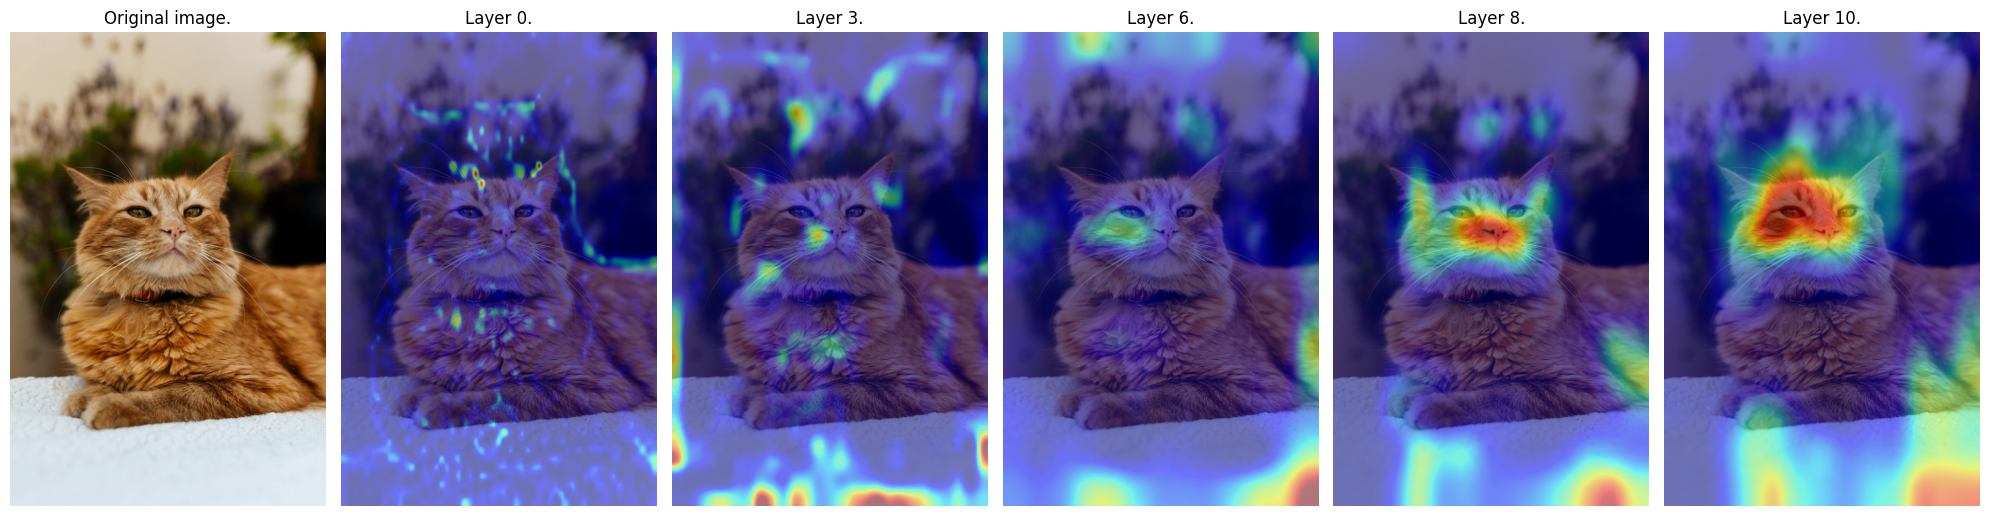

In [12]:
layer_number = [0, 3, 6, 8, 10]
utils.layers_vizualization(model, img1, tensor_img1, y_pred1, layer_number)


In [ ]:
img2, tensor_img2 = utils.load_image('./image2.jpg', device, weights)
y_pred2 = utils.predict(model, weights, tensor_img2)

Predikted klass of picture is: SPORTS CAR.


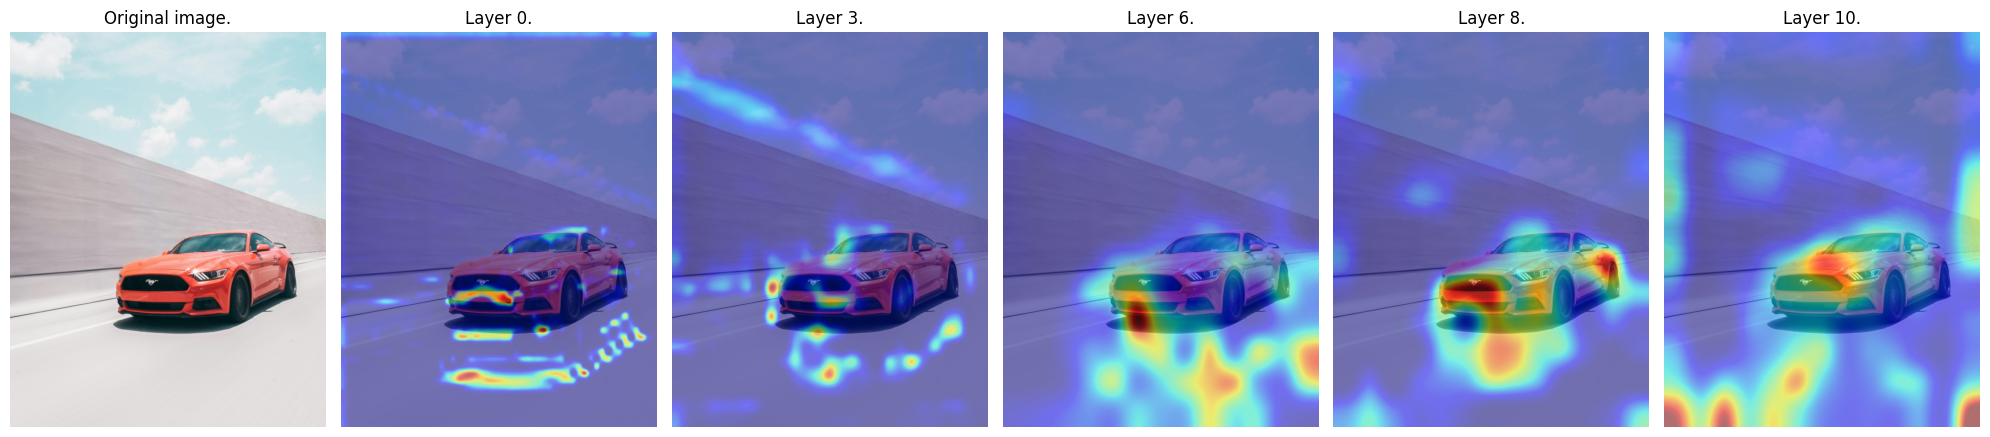

In [ ]:
layer_number = [0, 3, 6, 8, 10]
utils.layers_vizualization(model, img2, tensor_img2, y_pred2, layer_number)


---
# **Sammanfattning.**
---
Denna 